In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

import seaborn as sns


In [42]:
dfd = pd.read_csv("CSVs\dfdd.csv")
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']

dfc = pd.read_csv("CSVs\dfcc.csv")
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']

In [43]:
corlist = dfc.columns
dfcsr = dfc.copy(deep=True)
dfdsr = dfd.copy(deep=True)
for i in corlist:
    for j in range(554):
        dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
for i in corlist:
    for j in range(554):
        dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))

<ipython-input-43-e674f1c64e0d>:6: RuntimeWarning: invalid value encountered in double_scalars
  dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
<ipython-input-43-e674f1c64e0d>:9: RuntimeWarning: invalid value encountered in double_scalars
  dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))


In [54]:
dfcsr.drop(dfcsr.head(10).index,inplace=True)
dfcsr.drop(dfcsr.tail(10).index,inplace=True)

In [55]:
yaxis = dfcsr['Russia'].values
xaxis = [i for i in range(160,694)]

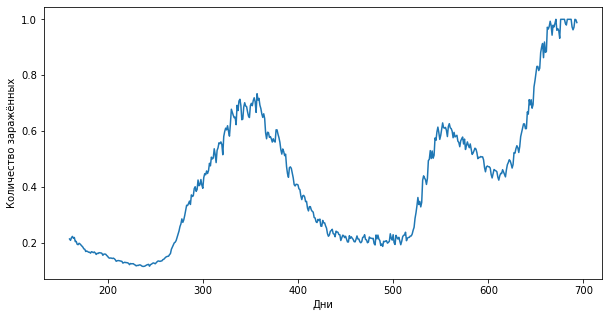

In [56]:
plt.figure(figsize=(10,5))
plt.plot(xaxis, yaxis)
plt.xlabel('Дни')
plt.ylabel('Количество заражённых')
plt.show()

In [57]:
xaxis1 = np.reshape(xaxis, (-1, 1))
lr.fit(xaxis1, yaxis)

LinearRegression()

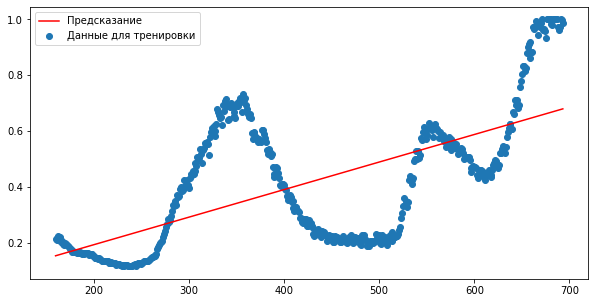

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(xaxis, yaxis, label='Данные для тренировки')
plt.plot(xaxis,lr.predict(xaxis1), label='Предсказание', c='red')
plt.legend()
plt.show()

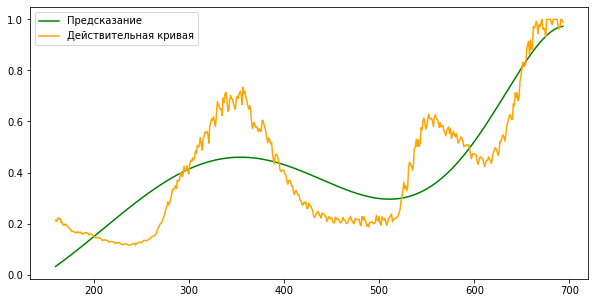

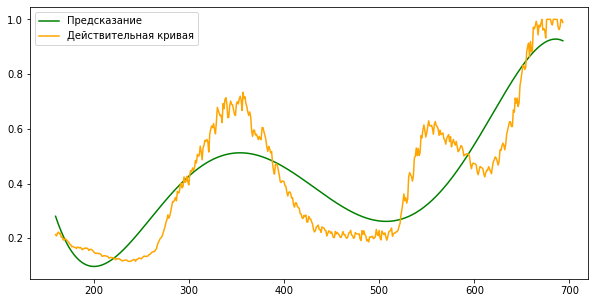

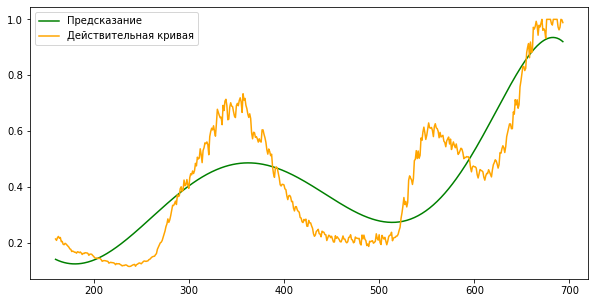

0.11432797740930703

In [65]:
rmses = []
#enumerate = [i for i in range(10)]
enumerate = [7,5,6]

for i in enumerate:
    p = PolynomialFeatures(i, include_bias=True)
    
    xaxis_poly = p.fit_transform(xaxis1)

    lr.fit(xaxis_poly, yaxis)

    xaxis_ = np.linspace(xaxis1.min(0), xaxis1.max(0), 534).reshape(534,1)
    y_pred_lr = lr.predict(p.transform(xaxis_))
    poly_mse = mean_squared_error(yaxis, y_pred_lr)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    plt.figure(figsize=(10,5))
#    plt.scatter(xaxis, yaxis, label='Данные для тренировки') #не вижу смысла проставлять точки, ибо они просто будут накладываться на кривую
    plt.plot(xaxis_, y_pred_lr, label='Предсказание', c='green')
    plt.plot(xaxis, yaxis, label='Действительная кривая', c='orange')
    plt.legend()
    plt.show()
rmses
min(rmses)

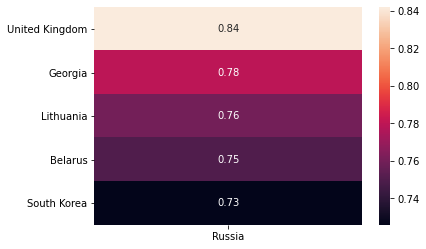

In [138]:
lisc = list(dfcsr.columns)
inp='Russia' #Afghanistan
inpcol=lisc.index(inp)
c = dfcsr.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
plt.show()

In [71]:
cd

,Russia
United Kingdom,0.841847
Georgia,0.779676
Lithuania,0.759978
Belarus,0.750037
South Korea,0.725827


In [135]:
y = dfcsr['Russia'].values
Val = [dfcsr['United Kingdom'].values, dfcsr['Georgia'].values, dfcsr['Belarus'].values, dfcsr['Lithuania'].values, dfcsr['South Korea'].values]

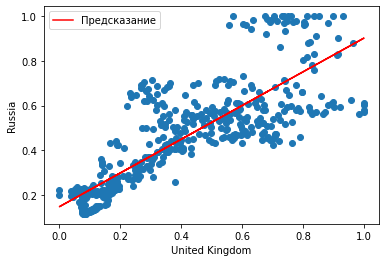

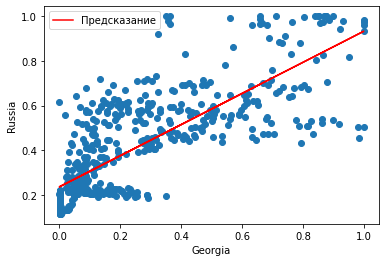

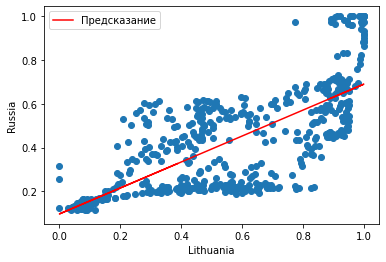

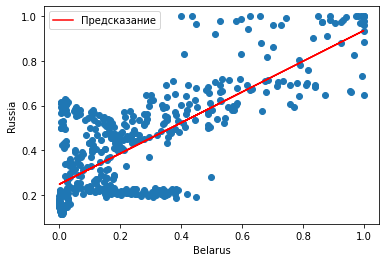

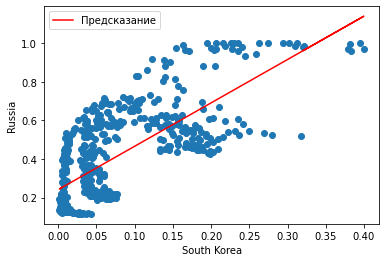

In [136]:
for i in range(5):
    x1p = np.reshape(Val[i], (-1, 1))
    lr.fit(x1p, y)
    plt.scatter(Val[i], y)
    plt.plot(x1p,lr.predict(x1p), label='Предсказание', c='red')
    plt.xlabel(cd.index[i])
    plt.ylabel('Russia')
    plt.legend()
    plt.show()

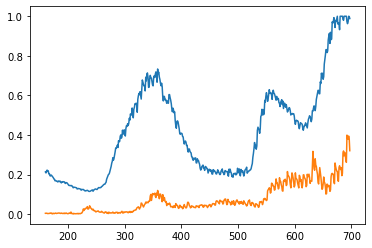

In [134]:
plt.plot(dfcsr['Russia'])
plt.plot(dfcsr['South Korea'])
plt.show()